## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


##Cleaning up Data

In [0]:
import pandas as pd
import numpy as np


#Let's pass some column headers
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',names=column_headers)


In [5]:
print(votes.shape)
votes.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [7]:
# Using categorical encoding, I will re-work my data to go from binary values to numeric values. This will make it easier for me to manipulate the data

votes = votes.replace({'y':1 , 'n':0 , '?': np.NaN})

votes.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [9]:
print(votes.isnull().sum())

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64


In [8]:
## Drop NaN Values & Save to a Subset -> votes_cleaned
votes_cleaned = votes.dropna()
votes_cleaned.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
##Check Subset for NaN values
print(votes_cleaned.isnull().sum())

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64


##Democrats


In [54]:
# Democrats

dem = votes_cleaned[votes_cleaned['party']=='democrat']
print(dem.shape)
dem.head()

(124, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [65]:
#Drop Party column & check out your data 
dems = dem.drop('party', axis=1)
print(dems.shape)
dems.describe()

(124, 16)


,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.588710,0.451613,0.854839,0.048387,0.201613,0.443548,0.766129,0.830645,0.790323,0.532258,0.508065,0.129032,0.290323,0.346774,0.596774,0.943548
std,0.494064,0.499672,0.353692,0.215453,0.402832,0.498818,0.425008,0.376587,0.408730,0.500983,0.501963,0.336596,0.455753,0.477874,0.492535,0.231728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Republicans

In [75]:
# Republicans

rep = votes_cleaned[votes_cleaned['party']=='republican']
print(rep.shape)
rep.head()

(108, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [76]:
#Drop Party column & check out your data 
rep = rep.drop('party', axis=1)
print(rep.shape)
rep.describe()

(108, 16)


,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.212963,0.472222,0.157407,0.990741,0.953704,0.870370,0.268519,0.148148,0.138889,0.574074,0.157407,0.851852,0.842593,0.981481,0.111111,0.666667
std,0.411310,0.501555,0.365882,0.096225,0.211106,0.337461,0.445255,0.356903,0.347443,0.496788,0.365882,0.356903,0.365882,0.135445,0.315735,0.473602
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Confidence Interval Formula :) 

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  standard_error = s / np.sqrt(n)
  t = stats.t.ppf((1+ confidence)/ 2.0, n-1)
  margin_of_error = t * standard_error
  return(x_bar - margin_of_error, x_bar, x_bar + margin_of_error)

## Confidence interval around the mean levels of support for bills for **Democrats**

In [78]:
dem_confidence_intervals = []
for col in dems:
  cleaned_col = dems[col]
  dem_confidence_intervals.append(confidence_interval(cleaned_col))
dem_confidence_intervals

[(0.5008854514528094, 0.5887096774193549, 0.6765339033859004),
 (0.3627917755681809, 0.45161290322580644, 0.540434030883432),
 (0.791966749899413, 0.8548387096774194, 0.9177106694554258),
 (0.01008836071171925, 0.04838709677419355, 0.08668583283666784),
 (0.13000591391201893, 0.20161290322580644, 0.27321989253959394),
 (0.3548790007497182, 0.4435483870967742, 0.5322177734438303),
 (0.6905800506734978, 0.7661290322580645, 0.8416780138426312),
 (0.7637035637475735, 0.8306451612903226, 0.8975867588330717),
 (0.7176672431336555, 0.7903225806451613, 0.862977918156667),
 (0.44320399355877216, 0.532258064516129, 0.6213121354734858),
 (0.41883613678222775, 0.5080645161290323, 0.5972928954758367),
 (0.06919940918552969, 0.12903225806451613, 0.18886510694350256),
 (0.2093085202865504, 0.2903225806451613, 0.3713366410037722),
 (0.26182787733541646, 0.3467741935483871, 0.4317205097613578),
 (0.5092216687100866, 0.5967741935483871, 0.6843267183866877),
 (0.9023566825660085, 0.9435483870967742, 0.98

##Confidence Interval around the mean levels of support for bills for **Republicans**



In [79]:
rep_confidence_intervals = []
for col in rep:
  cleaned_col2 = rep[col]
  rep_confidence_intervals.append(confidence_interval(cleaned_col2))
rep_confidence_intervals

[(0.13450349074958223, 0.21296296296296297, 0.2914224351763437),
 (0.3765480931771919, 0.4722222222222222, 0.5678963512672525),
 (0.08761355698812177, 0.1574074074074074, 0.22720125782669304),
 (0.9723853391655276, 0.9907407407407407, 1.009096142315954),
 (0.913434261310743, 0.9537037037037037, 0.9939731460966644),
 (0.8059979340740583, 0.8703703703703703, 0.9347428066666824),
 (0.18358393802160433, 0.26851851851851855, 0.35345309901543276),
 (0.08006715123831286, 0.14814814814814814, 0.2162291450579834),
 (0.07261245914426012, 0.1388888888888889, 0.20516531863351767),
 (0.4793093369789436, 0.5740740740740741, 0.6688388111692045),
 (0.08761355698812177, 0.1574074074074074, 0.22720125782669304),
 (0.7837708549420166, 0.8518518518518519, 0.9199328487616871),
 (0.7727987421733069, 0.8425925925925926, 0.9123864430118782),
 (0.955644609582101, 0.9814814814814815, 1.007318353380862),
 (0.050883138942941386, 0.1111111111111111, 0.17133908327928082),
 (0.5763247084144121, 0.6666666666666666, 0

###Creating Confidence Interval dataframes for **Dems** and **Reps**

In [87]:
# DEMOCRATS
column_names = ['lower', 'mean', 'upper']

CI = pd.DataFrame(dem_confidence_intervals, columns=column_names)
CI['moe'] = CI['mean'] - CI['lower']
print(CI.shape)
CI.head()



(16, 4)


,lower,mean,upper,moe
0,0.500885,0.588710,0.676534,0.087824
1,0.362792,0.451613,0.540434,0.088821
2,0.791967,0.854839,0.917711,0.062872
3,0.010088,0.048387,0.086686,0.038299
4,0.130006,0.201613,0.273220,0.071607


In [0]:
dem_mean = CI['mean']
dem_moe = CI['moe']

In [94]:
# REPUBLICANS
column_names = ['lower2', 'mean2', 'upper2']

CI2 = pd.DataFrame(rep_confidence_intervals, columns=column_names)
CI2['moe2'] = CI2['mean2'] - CI2['lower2']
print(CI.shape)
CI2.head()

(16, 4)


,lower2,mean2,upper2,moe2
0,0.134503,0.212963,0.291422,0.078459
1,0.376548,0.472222,0.567896,0.095674
2,0.087614,0.157407,0.227201,0.069794
3,0.972385,0.990741,1.009096,0.018355
4,0.913434,0.953704,0.993973,0.040269


In [0]:
rep_mean = CI2['mean2']
rep_moe = CI2['moe2']

##Time to Graph.




By looking at my graphs, I can conclude that more Republicans voted in favor of these bills than Democrats did.

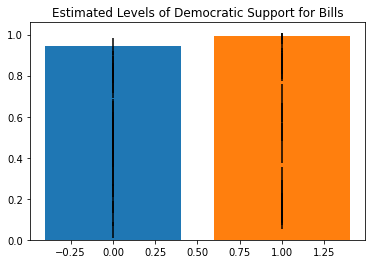

In [97]:
## Let's graph !
import matplotlib.pyplot as plt

plt.bar(0, height=dem_mean, yerr=dem_moe)
plt.bar(1, height=rep_mean, yerr=rep_moe)
plt.title("Estimated Levels of Democratic and Republican Support for Bills")
plt.show()

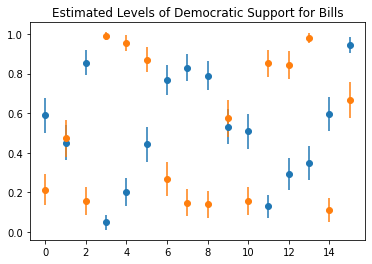

In [100]:
plt.errorbar(x=range(0,16), y=dem_mean, yerr=dem_moe, fmt='o')
plt.errorbar(x=range(0,16), y=rep_mean, yerr=rep_moe, fmt='o')
plt.title("Estimated Levels of Democratic and Republican Support for Bills")
plt.show()

##Chi$^2$ Test

In [102]:
# I'll be using the adult dataset

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?",)
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [103]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [104]:
df['relationship'].value_counts().sort_index()

 Husband           13193
 Not-in-family      8305
 Other-relative      981
 Own-child          5068
 Unmarried          3446
 Wife               1568
Name: relationship, dtype: int64

In [105]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

##By hand

In [110]:
# Making a crosstab of 'race' and 'relationship' columns 
observed = pd.crosstab(df['race'],df['relationship'])

observed

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
race,,,,,,
Amer-Indian-Eskimo,92,81,13,48,58,19
Asian-Pac-Islander,410,214,82,173,91,69
Black,671,812,164,555,769,153
Other,80,73,28,37,37,16
White,11940,7125,694,4255,2491,1311


In [111]:
observed_margins = pd.crosstab(df['race'],df['relationship'], margins=True)
observed_margins

relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,All
race,,,,,,,
Amer-Indian-Eskimo,92,81,13,48,58,19,311
Asian-Pac-Islander,410,214,82,173,91,69,1039
Black,671,812,164,555,769,153,3124
Other,80,73,28,37,37,16,271
White,11940,7125,694,4255,2491,1311,27816
All,13193,8305,981,5068,3446,1568,32561


In [116]:
row_sums = observed_margins.iloc[0:5, 6:].values
row_sums = row_sums.T[0]

row_sums

array([  311,  1039,  3124,   271, 27816])

In [118]:
col_sums = observed_margins.iloc[5:, :6].values
col_sums = col_sums[0]

col_sums

array([13193,  8305,   981,  5068,  3446,  1568])

In [119]:
total_total = df.shape[0]

total_total

32561

In [120]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(5, 6)
[[1.26010350e+02 7.93235773e+01 9.36982894e+00 4.84060072e+01
  3.29137926e+01 1.49764442e+01]
 [4.20979915e+02 2.65007064e+02 3.13030619e+01 1.61716532e+02
  1.09959584e+02 5.00338442e+01]
 [1.26577599e+03 7.96806609e+02 9.41200823e+01 4.86239120e+02
  3.30619576e+02 1.50438623e+02]
 [1.09803231e+02 6.91211879e+01 8.16470624e+00 4.21801542e+01
  2.86805074e+01 1.30502134e+01]
 [1.12704305e+04 7.09474156e+03 8.38042321e+02 4.32945819e+03
  2.94382654e+03 1.33950088e+03]]


In [121]:
chi2 = ((observed-expected)**2 / expected).sum().sum()

chi2

1253.3840595964266

##Using SciPy

1) Null Hypothesis: The Race and Relationship status of census responders are independent of eachother.

2) Alternative Hypothesis: They are dependent of eachother.

3) Confidence Level: 95%

In [122]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print("chi2 statistic", chi2)
print("p value", p_value)
print("degrees of freedom",dof)
print("expected frequencies table", expected)

chi2 statistic 1253.3840595964264
p value 2.825570052626954e-253
degrees of freedom 20
expected frequencies table [[1.26010350e+02 7.93235773e+01 9.36982894e+00 4.84060072e+01
  3.29137926e+01 1.49764442e+01]
 [4.20979915e+02 2.65007064e+02 3.13030619e+01 1.61716532e+02
  1.09959584e+02 5.00338442e+01]
 [1.26577599e+03 7.96806609e+02 9.41200823e+01 4.86239120e+02
  3.30619576e+02 1.50438623e+02]
 [1.09803231e+02 6.91211879e+01 8.16470624e+00 4.21801542e+01
  2.86805074e+01 1.30502134e+01]
 [1.12704305e+04 7.09474156e+03 8.38042321e+02 4.32945819e+03
  2.94382654e+03 1.33950088e+03]]


4)**Conclusion**: Due to a test-statistic of 1253.38 and a p-value of 2.85*10$^-253$ (p-value < 0.5), I **REJECT** the null hypothesis and suggest the alternative, that there is an association between the race and relationship status of the census responders.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)